In [2]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
import matplotlib.pyplot as plt
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
import re

In [3]:
base_url = "https://nextspaceflight.com/launches/past/"
last_page = 1


In [4]:


options = Options()
options.add_argument("--headless=new")
browser = webdriver.Chrome(options=options)

launch_data = []
for page in range(1, last_page + 1):
    browser.get(f"{base_url}?page={page}")
    cards = browser.find_elements(By.CLASS_NAME, "mdl-card")
    for card in cards:
        company = card.find_element(By.CLASS_NAME, "mdl-card__title-text").text
        rocket_and_payload = card.find_element(By.CLASS_NAME, "header-style").text
        date_and_location = card.find_element(By.CLASS_NAME, "mdl-card__supporting-text").text
        details_url = card.find_element(By.CLASS_NAME, "mdc-button").get_attribute("href")
        border_color = card.value_of_css_property("border-top-color")

        if "rgba(69, 207, 93, 1)" == border_color:
            successful = "1" #Exito
        else:
            successful = "0" #Fracaso

        launch_dict = {
            'company': company,
            'rocket_and_payload': rocket_and_payload,
            'date_and_location': date_and_location,
            'details_url': details_url,
            'successful': successful
        }
        launch_data.append(launch_dict)
browser.quit()

df = pd.DataFrame(launch_data, columns=['company', 'rocket_and_payload', 'date_and_location', 'details_url', 'successful'])

In [5]:
browser = webdriver.Chrome(options=options)
wait = WebDriverWait(browser, 10)


prices = []
leo_weights = []  
gto_weights = []  
rocket_heights = []
fairing_diameters = []
fairing_heights = []

for index in range(len(df.details_url)):
    print(f"Processing launch {index + 1}/{len(df.details_url)}")
    browser.get(df.details_url[index])

    details_els = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, "mdl-card__supporting-text")))
    details_texts = [el.text for el in details_els]

    price = 0.0
    leo_weight = 0
    gto_weight = 0
    rocket_h = 0.0
    fairing_d = 0.0
    fairing_h = 0.0

    if len(details_texts) > 1:
        parts = details_texts[1].split("\n")
        for part in parts:
            if "Price: " in part:
                price = part.replace("Price: ", "").replace("$", "").replace(" million", "").strip()
                price = float(price)
            elif "Payload to LEO:" in part:
                leo_weight = part.replace("Payload to LEO:", "").replace("kg", "").strip()
                leo_weight = int(leo_weight.replace(',', ''))
            elif "Payload to GTO:" in part:
                gto_weight = part.replace("Payload to GTO:", "").replace("kg", "").strip()
                gto_weight = int(gto_weight.replace(',', ''))
            elif "Rocket Height:" in part:  
                rocket_h = part.replace("Rocket Height:", "").replace("m", "").strip()
                rocket_h = float(rocket_h)
            elif "Fairing Diameter:" in part:
                fairing_d = part.replace("Fairing Diameter:", "").replace("m", "").strip()
                fairing_d = float(fairing_d)
            elif "Fairing Height:" in part:
                fairing_h = part.replace("Fairing Height:", "").replace("m", "").strip()
                fairing_h = float(fairing_h)

   
    prices.append(price)
    leo_weights.append(leo_weight)
    gto_weights.append(gto_weight)
    rocket_heights.append(rocket_h)
    fairing_diameters.append(fairing_d)
    fairing_heights.append(fairing_h)

browser.quit()


df["price_million"] = prices
df["leo_weight_kg"] = leo_weights
df["gto_weight_kg"] = gto_weights
df["total_payload_kg"] = df["leo_weight_kg"] + df["gto_weight_kg"]
df["rocket_height_m"] = rocket_heights
df["fairing_diameter_m"] = fairing_diameters
df["fairing_height_m"] = fairing_heights

df

Processing launch 1/30
Processing launch 2/30
Processing launch 2/30
Processing launch 3/30
Processing launch 3/30
Processing launch 4/30
Processing launch 4/30
Processing launch 5/30
Processing launch 5/30
Processing launch 6/30
Processing launch 6/30
Processing launch 7/30
Processing launch 7/30
Processing launch 8/30
Processing launch 8/30
Processing launch 9/30
Processing launch 9/30
Processing launch 10/30
Processing launch 10/30
Processing launch 11/30
Processing launch 11/30
Processing launch 12/30
Processing launch 12/30
Processing launch 13/30
Processing launch 13/30
Processing launch 14/30
Processing launch 14/30
Processing launch 15/30
Processing launch 15/30
Processing launch 16/30
Processing launch 16/30
Processing launch 17/30
Processing launch 17/30
Processing launch 18/30
Processing launch 18/30
Processing launch 19/30
Processing launch 19/30
Processing launch 20/30
Processing launch 20/30
Processing launch 21/30
Processing launch 21/30
Processing launch 22/30
Processin

,company,rocket_and_payload,date_and_location,details_url,successful,price_million,leo_weight_kg,gto_weight_kg,total_payload_kg,rocket_height_m,fairing_diameter_m,fairing_height_m
0,Roscosmos,Soyuz 2.1a | Progress MS-32,"Thu Sep 11, 2025 12:54 CLST\nSite 31/6, Baikon...",https://nextspaceflight.com/launches/details/7710,1,17.42,7500,0,7500,51.38,4.11,15.59
1,SpaceX,Falcon 9 Block 5 | Tranche 1 Transport Layer B,"Wed Sep 10, 2025 11:12 CLST\nSLC-4E, Vandenber...",https://nextspaceflight.com/launches/details/7219,1,69.75,22800,8300,31100,70.00,5.20,13.00
2,CASC,Long March 7A | Yaogan 45,"Mon Sep 8, 2025 23:00 CLST\nLC-201, Wenchang S...",https://nextspaceflight.com/launches/details/7943,1,0.00,12000,7000,19000,58.00,4.20,12.40
3,Chinarocket,Jielong 3 | Geely Constellation Group 05,"Mon Sep 8, 2025 16:48 CLST\nOriental Spaceport...",https://nextspaceflight.com/launches/details/7942,1,0.00,1500,0,1500,31.00,3.35,0.00
4,SpaceX,Falcon 9 Block 5 | Starlink Group 17-9,"Sat Sep 6, 2025 2:06 PM CLT\nSLC-4E, Vandenber...",https://nextspaceflight.com/launches/details/7935,1,69.75,22800,8300,31100,70.00,5.20,13.00
5,CASC,Long March 6A | Yaogan 40 Group 03,"Sat Sep 6, 2025 12:34 PM CLT\nLC-9A, Taiyuan S...",https://nextspaceflight.com/launches/details/7940,1,0.00,5000,0,5000,50.00,4.20,5.70
6,SpaceX,Falcon 9 Block 5 | Starlink Group 10-57,"Fri Sep 5, 2025 8:32 AM CLT\nLC-39A, Kennedy S...",https://nextspaceflight.com/launches/details/7934,1,69.75,22800,8300,31100,70.00,5.20,13.00
7,Galactic Energy,Ceres 1 | 3 satellites,"Fri Sep 5, 2025 7:39 AM CLT\nSite 95A, Jiuquan...",https://nextspaceflight.com/launches/details/7939,1,4.38,400,0,400,19.00,1.40,2.50
8,CASC,Long March 3C/YZ-1 | Shiyan 29,"Thu Sep 4, 2025 10:34 PM CLT\nLC-2, Xichang Sa...",https://nextspaceflight.com/launches/details/7938,1,20.00,7500,3500,11000,55.64,4.20,9.78
9,SpaceX,Falcon 9 Block 5 | Starlink Group 10-22,"Wed Sep 3, 2025 7:56 AM CLT\nSLC-40, Cape Cana...",https://nextspaceflight.com/launches/details/7930,1,69.75,22800,8300,31100,70.00,5.20,13.00


In [6]:
df.size
df.shape

(30, 12)

In [8]:
df["rocket"] = df["rocket_and_payload"].str.split("|").str[0]
df["payload"] = df["rocket_and_payload"].str.split("|").str[1]
df["date"] = df["date_and_location"].str.split("\n").str[0]
df["location"] = df["date_and_location"].str.split("\n").str[1]
df.drop(columns=["rocket_and_payload", "date_and_location"], inplace=True)
df

,company,details_url,successful,price_million,leo_weight_kg,gto_weight_kg,total_payload_kg,rocket_height_m,fairing_diameter_m,fairing_height_m,rocket,payload,date,location
0,Roscosmos,https://nextspaceflight.com/launches/details/7710,1,17.42,7500,0,7500,51.38,4.11,15.59,Soyuz 2.1a,Progress MS-32,"Thu Sep 11, 2025 12:54 CLST","Site 31/6, Baikonur Cosmodrome, Kazakhstan"
1,SpaceX,https://nextspaceflight.com/launches/details/7219,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Tranche 1 Transport Layer B,"Wed Sep 10, 2025 11:12 CLST","SLC-4E, Vandenberg SFB, California, USA"
2,CASC,https://nextspaceflight.com/launches/details/7943,1,0.00,12000,7000,19000,58.00,4.20,12.40,Long March 7A,Yaogan 45,"Mon Sep 8, 2025 23:00 CLST","LC-201, Wenchang Space Launch Site, China"
3,Chinarocket,https://nextspaceflight.com/launches/details/7942,1,0.00,1500,0,1500,31.00,3.35,0.00,Jielong 3,Geely Constellation Group 05,"Mon Sep 8, 2025 16:48 CLST","Oriental Spaceport Launch Ship (Area 1), China..."
4,SpaceX,https://nextspaceflight.com/launches/details/7935,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Starlink Group 17-9,"Sat Sep 6, 2025 2:06 PM CLT","SLC-4E, Vandenberg SFB, California, USA"
5,CASC,https://nextspaceflight.com/launches/details/7940,1,0.00,5000,0,5000,50.00,4.20,5.70,Long March 6A,Yaogan 40 Group 03,"Sat Sep 6, 2025 12:34 PM CLT","LC-9A, Taiyuan Satellite Launch Center, China"
6,SpaceX,https://nextspaceflight.com/launches/details/7934,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Starlink Group 10-57,"Fri Sep 5, 2025 8:32 AM CLT","LC-39A, Kennedy Space Center, Florida, USA"
7,Galactic Energy,https://nextspaceflight.com/launches/details/7939,1,4.38,400,0,400,19.00,1.40,2.50,Ceres 1,3 satellites,"Fri Sep 5, 2025 7:39 AM CLT","Site 95A, Jiuquan Satellite Launch Center, China"
8,CASC,https://nextspaceflight.com/launches/details/7938,1,20.00,7500,3500,11000,55.64,4.20,9.78,Long March 3C/YZ-1,Shiyan 29,"Thu Sep 4, 2025 10:34 PM CLT","LC-2, Xichang Satellite Launch Center, China"
9,SpaceX,https://nextspaceflight.com/launches/details/7930,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Starlink Group 10-22,"Wed Sep 3, 2025 7:56 AM CLT","SLC-40, Cape Canaveral SFS, Florida, USA"


In [9]:
def clean_date(scraped_date_string):
    months = {"Jan":"01", "Feb":"02", "Mar":"03", "Apr":"04", "May":"05", "Jun":"06",
              "Jul":"07", "Aug":"08", "Sep":"09", "Oct":"10", "Nov":"11", "Dec":"12"}
    parts = scraped_date_string.split(" ")
    month = parts[1]
    day = parts[2].replace(",", "")
    year = parts[3]
    return f"{year}/{months[month]}/{day}"

In [10]:
df["cleaned_date"] = df["date"].apply(clean_date)
df["year"] = df["cleaned_date"].str.split("/").str[0]
df["month"] = df["cleaned_date"].str.split("/").str[1]
df["day"] = df["cleaned_date"].str.split("/").str[2]
df.drop(columns=["date", "cleaned_date"], inplace=True)
df

,company,details_url,successful,price_million,leo_weight_kg,gto_weight_kg,total_payload_kg,rocket_height_m,fairing_diameter_m,fairing_height_m,rocket,payload,location,year,month,day
0,Roscosmos,https://nextspaceflight.com/launches/details/7710,1,17.42,7500,0,7500,51.38,4.11,15.59,Soyuz 2.1a,Progress MS-32,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2025,09,11
1,SpaceX,https://nextspaceflight.com/launches/details/7219,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Tranche 1 Transport Layer B,"SLC-4E, Vandenberg SFB, California, USA",2025,09,10
2,CASC,https://nextspaceflight.com/launches/details/7943,1,0.00,12000,7000,19000,58.00,4.20,12.40,Long March 7A,Yaogan 45,"LC-201, Wenchang Space Launch Site, China",2025,09,8
3,Chinarocket,https://nextspaceflight.com/launches/details/7942,1,0.00,1500,0,1500,31.00,3.35,0.00,Jielong 3,Geely Constellation Group 05,"Oriental Spaceport Launch Ship (Area 1), China...",2025,09,8
4,SpaceX,https://nextspaceflight.com/launches/details/7935,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Starlink Group 17-9,"SLC-4E, Vandenberg SFB, California, USA",2025,09,6
5,CASC,https://nextspaceflight.com/launches/details/7940,1,0.00,5000,0,5000,50.00,4.20,5.70,Long March 6A,Yaogan 40 Group 03,"LC-9A, Taiyuan Satellite Launch Center, China",2025,09,6
6,SpaceX,https://nextspaceflight.com/launches/details/7934,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Starlink Group 10-57,"LC-39A, Kennedy Space Center, Florida, USA",2025,09,5
7,Galactic Energy,https://nextspaceflight.com/launches/details/7939,1,4.38,400,0,400,19.00,1.40,2.50,Ceres 1,3 satellites,"Site 95A, Jiuquan Satellite Launch Center, China",2025,09,5
8,CASC,https://nextspaceflight.com/launches/details/7938,1,20.00,7500,3500,11000,55.64,4.20,9.78,Long March 3C/YZ-1,Shiyan 29,"LC-2, Xichang Satellite Launch Center, China",2025,09,4
9,SpaceX,https://nextspaceflight.com/launches/details/7930,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Starlink Group 10-22,"SLC-40, Cape Canaveral SFS, Florida, USA",2025,09,3


In [11]:
volumen_cohete = 3.1416 * (df["fairing_diameter_m"] / 2) ** 2 * df["rocket_height_m"]
volumen_carenado = 3.1416 * (df["fairing_diameter_m"] / 2) ** 2 * df["fairing_height_m"] * (1/3)
df["volumen_total_m3"] = volumen_cohete + volumen_carenado
df


,company,details_url,successful,price_million,leo_weight_kg,gto_weight_kg,total_payload_kg,rocket_height_m,fairing_diameter_m,fairing_height_m,rocket,payload,location,year,month,day,volumen_total_m3
0,Roscosmos,https://nextspaceflight.com/launches/details/7710,1,17.42,7500,0,7500,51.38,4.11,15.59,Soyuz 2.1a,Progress MS-32,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2025,09,11,750.605768
1,SpaceX,https://nextspaceflight.com/launches/details/7219,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Tranche 1 Transport Layer B,"SLC-4E, Vandenberg SFB, California, USA",2025,09,10,1578.633056
2,CASC,https://nextspaceflight.com/launches/details/7943,1,0.00,12000,7000,19000,58.00,4.20,12.40,Long March 7A,Yaogan 45,"LC-201, Wenchang Space Launch Site, China",2025,09,8,860.823533
3,Chinarocket,https://nextspaceflight.com/launches/details/7942,1,0.00,1500,0,1500,31.00,3.35,0.00,Jielong 3,Geely Constellation Group 05,"Oriental Spaceport Launch Ship (Area 1), China...",2025,09,8,273.238697
4,SpaceX,https://nextspaceflight.com/launches/details/7935,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Starlink Group 17-9,"SLC-4E, Vandenberg SFB, California, USA",2025,09,6,1578.633056
5,CASC,https://nextspaceflight.com/launches/details/7940,1,0.00,5000,0,5000,50.00,4.20,5.70,Long March 6A,Yaogan 40 Group 03,"LC-9A, Taiyuan Satellite Launch Center, China",2025,09,6,719.046266
6,SpaceX,https://nextspaceflight.com/launches/details/7934,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Starlink Group 10-57,"LC-39A, Kennedy Space Center, Florida, USA",2025,09,5,1578.633056
7,Galactic Energy,https://nextspaceflight.com/launches/details/7939,1,4.38,400,0,400,19.00,1.40,2.50,Ceres 1,3 satellites,"Site 95A, Jiuquan Satellite Launch Center, China",2025,09,5,30.531116
8,CASC,https://nextspaceflight.com/launches/details/7938,1,20.00,7500,3500,11000,55.64,4.20,9.78,Long March 3C/YZ-1,Shiyan 29,"LC-2, Xichang Satellite Launch Center, China",2025,09,4,816.027458
9,SpaceX,https://nextspaceflight.com/launches/details/7930,1,69.75,22800,8300,31100,70.00,5.20,13.00,Falcon 9 Block 5,Starlink Group 10-22,"SLC-40, Cape Canaveral SFS, Florida, USA",2025,09,3,1578.633056


In [20]:
df.to_csv('launches.csv', index=False)

### Visualización de datos

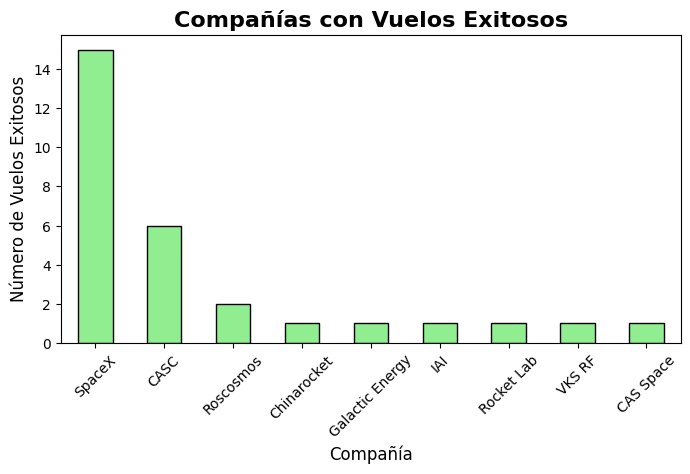


Vuelos exitosos por compañia:
company
SpaceX             15
CASC                6
Roscosmos           2
Chinarocket         1
Galactic Energy     1
IAI                 1
Rocket Lab          1
VKS RF              1
CAS Space           1
Name: count, dtype: int64


In [59]:
#Vuelos exitosos por compañia

df_exitosos = df[df['successful'] == '1']

vuelos_exitosos_por_compania = df_exitosos['company'].value_counts()

plt.figure(figsize=(8, 4))
ax = vuelos_exitosos_por_compania.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Compañías con Vuelos Exitosos', fontsize=16, fontweight='bold')
plt.xlabel('Compañía', fontsize=12)
plt.ylabel('Número de Vuelos Exitosos', fontsize=12)
plt.xticks(rotation=45)
plt.show()

print("\nVuelos exitosos por compañia:")
print(vuelos_exitosos_por_compania)

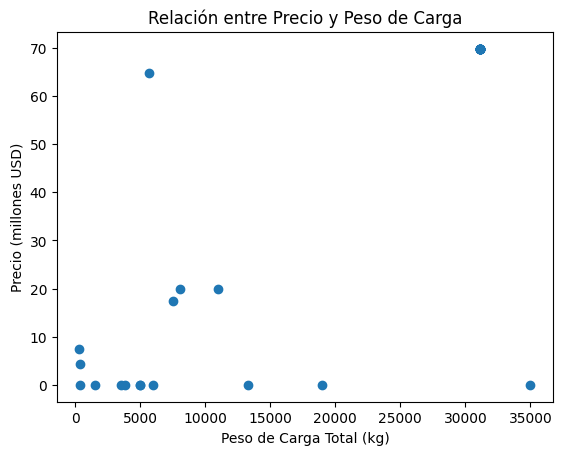

    price_million  total_payload_kg
0           17.42              7500
1           69.75             31100
2            0.00             19000
3            0.00              1500
4           69.75             31100
5            0.00              5000
6           69.75             31100
7            4.38               400
8           20.00             11000
9           69.75             31100
10          69.75             31100
11           0.00               350
12          69.75             31100
13          69.75             31100
14          69.75             31100
15          69.75             31100
16           0.00             35000
17          69.75             31100
18           0.00             13300
19          69.75             31100
20           7.50               320
21          69.75             31100
22          69.75             31100
23           0.00              3800
24          20.00              8020
25           0.00              3500
26          69.75           

In [19]:
# Relacion entre precio y peso de carga

df_valor_carga = df[['price_million', 'total_payload_kg']]

plt.scatter(df['total_payload_kg'], df['price_million'])
plt.title('Relación entre Precio y Peso de Carga')
plt.xlabel('Peso de Carga Total (kg)')
plt.ylabel('Precio (millones USD)')
plt.show()

print(df_valor_carga)

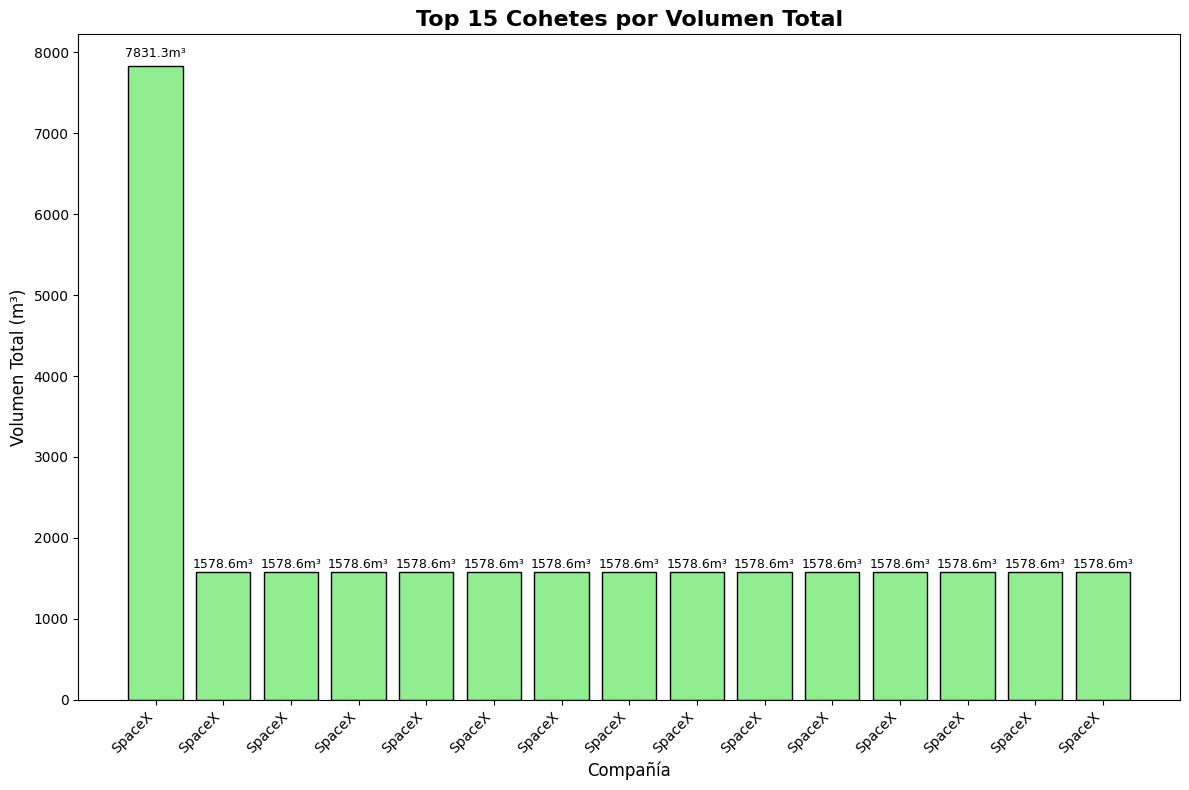

Top 15 Cohetes por Volumen Total:
   company  volumen_total_m3
16  SpaceX       7831.301940
1   SpaceX       1578.633056
10  SpaceX       1578.633056
12  SpaceX       1578.633056
9   SpaceX       1578.633056
4   SpaceX       1578.633056
13  SpaceX       1578.633056
26  SpaceX       1578.633056
21  SpaceX       1578.633056
19  SpaceX       1578.633056
17  SpaceX       1578.633056
15  SpaceX       1578.633056
14  SpaceX       1578.633056
6   SpaceX       1578.633056
22  SpaceX       1578.633056


In [58]:
# Empresas con cohetes más grandes por volumen total

df_big_rockets = df.sort_values(by='volumen_total_m3', ascending=False)


df_big_rockets_display = df_big_rockets[['company', 'volumen_total_m3']].head(15)

# Crear gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(df_big_rockets_display)), df_big_rockets_display['volumen_total_m3'], color='lightgreen', edgecolor='black')

# Personalizar el gráfico
plt.title('Top 15 Cohetes por Volumen Total', fontsize=16, fontweight='bold')
plt.xlabel('Compañía', fontsize=12)
plt.ylabel('Volumen Total (m³)', fontsize=12)

# Crear etiquetas solo con la compañía
labels = [row['company'] for _, row in df_big_rockets_display.iterrows()]
plt.xticks(range(len(df_big_rockets_display)), labels, rotation=45, ha='right', fontsize=10)

# Añadir valores encima de las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{height:.1f}m³', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Mostrar tabla con los datos
print("Top 15 Cohetes por Volumen Total:")
print(df_big_rockets_display)